# Recommendation System - Part I

In [ ]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib in line
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

In [ ]:
#Loading the dataset
sales_total = pd.read_csv('Data Capstone Stock.csv',delimiter=";")
sales_total = sales_total.dropna()
sales_total.head()

,product_id,product_class,sales_total,Timestamp
0,205616461,Buku dan Novel,1,1369699200
1,558925278,Buku dan Novel,2,1355443200
2,733001998,Buku dan Novel,1,1404691200
3,737104473,Buku dan Novel,1,1382572800
4,762451459,Buku dan Novel,1,1274227200


In [ ]:
sales_total.shape

(97922, 4)

In [ ]:
popular_products = pd.DataFrame(sales_total.groupby('product_id')['sales_total'].max())
most_popular = popular_products.sort_values(by=['sales_total'], ascending=False)
most_popular.head(10)

,sales_total
product_id,
B001MA0QY2,7533
B0009V1YR8,2869
B0000YUXI0,2143
B000ZMBSPE,2041
B003BQ6QXK,1918
B00121UVU0,1838
B000FS05VG,1589
B000142FVW,1558
B001JKTTVQ,1468


<Axes: xlabel='product_id'>

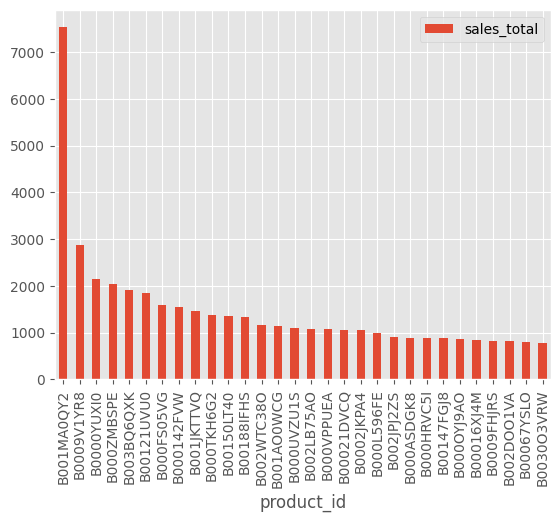

In [ ]:
most_popular.head(30).plot(kind = "bar")

# Recommendation System - Part II

In [ ]:
# Subset of MarketPlace Ratings

sales_total1 = sales_total.head(42500)

In [ ]:
ratings_utility_matrix = sales_total1.pivot_table(values='sales_total', index='product_class', columns='product_id', fill_value=0)
ratings_utility_matrix.head()

product_id,1304139212,1304139220,1304146537,1304168522,1304174778,1304174867,1304174905,1304196046,1304196062,1304196070,...,B00113GDYM,B00113GE32,B00113GEBE,B00113GEG4,B00113GFRC,B00113HNB4,B00113HO90,B00113HQKM,B00113I430,B00113IENK
product_class,,,,,,,,,,,,,,,,,,,,,
Buku dan Novel,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fashion Pria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fashion Wanita,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hampers dan Seserahan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Jam Tangan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#As expected, the utility matrix obtaned above is sparce, I have filled up the unknown values wth 0.
ratings_utility_matrix.shape

(9, 42500)

In [ ]:
#Transposing the matrix
X = ratings_utility_matrix.T
X.head()

product_class,Buku dan Novel,Fashion Pria,Fashion Wanita,Hampers dan Seserahan,Jam Tangan,Peralatan Portable,Perlengkapan Bayi,Perlengkapan Kado,Wewangian Rumah
product_id,,,,,,,,,
1304139212,0,0,0,0,0,0,1,0,0
1304139220,0,0,0,0,0,0,1,0,0
1304146537,0,0,0,0,0,0,1,0,0
1304168522,0,0,0,0,0,0,2,0,0
1304174778,0,0,0,0,0,0,2,0,0


In [ ]:
X.shape

(42500, 9)

In [ ]:
#Unique products in subset of data
X1 = X

In [ ]:
#Decomposing the Matrix
SVD = TruncatedSVD(n_components=5)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(42500, 5)

In [ ]:
#Correlation Matrix
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

In [ ]:
#Isolating Product ID #99 from the Correlation Matrix
X.index[99]

In [ ]:
#Index # of product ID purchased by customer
i = '762451459'

product_names = list(X.index)
product = product_names.index(i)
product

In [ ]:
#Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product
correlation_product = correlation_matrix[product]
correlation_product.shape

In [ ]:
#Recommending top 10 highly correlated products in sequence
Recommend = list(X.index[correlation_product > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i)
Recommend[0:9]

NameError: ignored

# Recommendation System - Part III

In [ ]:
# Importing libraries

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [ ]:
#Item to item based recommendation system based on product description**
#Applicable when business is setting up its E-commerce website for the first time
product_descriptions = pd.read_csv('Data Capstone Stock.csv',delimiter=";")
product_descriptions.shape

(97987, 4)

In [ ]:
# Missing values

product_descriptions = product_descriptions.dropna()
product_descriptions.shape
product_descriptions.head()

,product_id,product_class,sales_total,Timestamp
0,205616461,Buku dan Novel,1,1369699200
1,558925278,Buku dan Novel,2,1355443200
2,733001998,Buku dan Novel,1,1404691200
3,737104473,Buku dan Novel,1,1382572800
4,762451459,Buku dan Novel,1,1274227200


In [ ]:
product_descriptions1 = product_descriptions
# product_descriptions1.iloc[:,1]

product_descriptions1["product_class"]

0               Buku dan Novel
1               Buku dan Novel
2               Buku dan Novel
3               Buku dan Novel
4               Buku dan Novel
                 ...          
97982    Kebutuhan Sehari-hari
97983    Kebutuhan Sehari-hari
97984    Kebutuhan Sehari-hari
97985    Kebutuhan Sehari-hari
97986    Kebutuhan Sehari-hari
Name: product_class, Length: 97922, dtype: object

In [ ]:
#Feature extraction from product descriptions
#Converting the text in product description into numerical data for analysis
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["product_class"])
X1

<97922x59 sparse matrix of type '<class 'numpy.float64'>'
	with 262050 stored elements in Compressed Sparse Row format>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


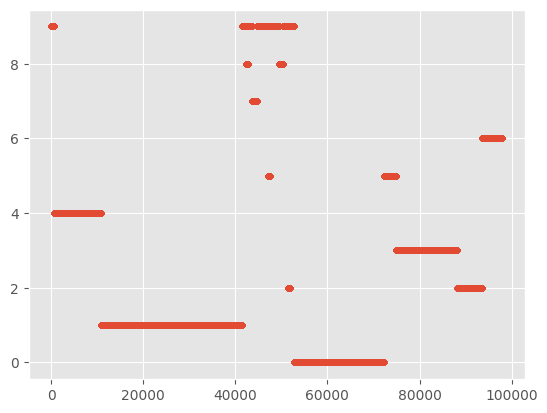

In [ ]:
# Feature extraction from product descriptions
# Converting the text in product description into numerical data for analysis
#Fitting K-Means to the dataset

X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [ ]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

# Output

In [ ]:
# # Optimal clusters is

true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print_cluster(i)

In [ ]:
#Predicting clusters based on key search words
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

In [ ]:
show_recommendations("Buku")

In [ ]:
show_recommendations("game")

In [ ]:
import pickle

pd.to_pickle(model, 'model.pkl')
pd.to_pickle(kmeans, 'model_kmeans.pkl')